<a href="https://colab.research.google.com/github/Donghae0230/project4/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***PROJECT 4***
###1. 관심 데이터 선정🙋‍♂️
---
: 편견, 혐오표현, 모욕에 대한 한국어 온라인 뉴스 댓글 데이터 [Korean HateSpeech Dataset](https://github.com/kocohub/korean-hate-speech) 활용

- 총 9,381개의 댓글(훈련 7,896개/검증 417개/테스트 974개)
- 태깅 과정에 대한 [가이드라인](https://www.notion.so/c1ecb7cc52d446cc93d928d172ef8442)
- Deepest 학술그룹 세미나 [발표자료](https://www.slideshare.net/WonIkCho/2005-moon-joydeepestfinal)
    - 온라인 포털 연예 뉴스기사의 경우 두터운 독자층, 확실한 타깃, 특정 집단에 치우치지 않는 갈등 존재
    - 데이터 수집 기간 Jan.2018 - Feb. 2020

데이터셋 중에서도 🌈***Gender-related bias*** 데이터 사용
- 성별에 따른 역할이나 능력에 대한 편견
- 성별과 나이에 대한 편견
- 그 외 특정 성별, 성적 지향성, 성 정체성, 성 관련 사상을 가진 집단에 대한 편견


###2. 데이터 선정 이유🙋‍♂️
---
- 유튜브, 개인방송, SNS, 게임 채팅 등 온라인 공간 확장
- 특정 집단 뿐만 아니라 일반인을 대상으로한 혐오 댓글 증가
- 피해자의 경우 외상 후 스트레스 장애 및 대인관계 기피, 공포로의 발전 가능성 존재

👉 기업차원에서 이 문제를 조금 더 적극적으로 대응하는 방법에 대해 고민한 결과 혐오 댓글을 분류하는 모델을 만들기로 함.
👉 한국어로 된 데이터 셋을 조사하였고 최종적으로 ***Korean HateSpeech Dataset***을 선택함.



###3. 데이터를 이용한 가설 수립🙋‍♂️
---
혐오 댓글 데이터에 대한 분류는 직접적으로, 간접적으로 사용자 보호 및 기업 댓글 서비스 개선에 도움을 줄 수 있을 것입니다.
- 직접적인 방법: 해당 댓글 삭제, 댓글 작성자 제재, 신고 등에 활용
- 간접적인 방법: 혐오 댓글 등록 시 경고 알림 등에 활용

###4. 데이터 살펴보기 및 전처리🙋‍♂️
---
❕ 데이터 살펴보기
- 중복값 유무 / 타겟 비율 / 길이 분포 확인
- Mecab과 word cloud를 활용한 시각화

❕ 데이터 전처리 
- 정규 표현식을 사용해 댓글 내 특수문자 제거
- 라벨 값 0과 1로 변경

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 데이터 가져오기
dataset_train = pd.read_csv('/content/drive/MyDrive/project4/gender_bias_data/train.gender_bias.binary.csv')
dataset_dev = pd.read_csv('/content/drive/MyDrive/project4/gender_bias_data/dev.gender_bias.binary.csv')

In [ ]:
print('train dataset 갯수:', len(dataset_train))
print('dev dataset 갯수:', len(dataset_dev))

train dataset 갯수: 7896
dev dataset 갯수: 471


In [ ]:
dataset_train.loc[dataset_train['label'] == False].head(20)

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False
5,10+8 진짜 이승기랑 비교된다,False
7,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,False
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,False
9,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,False
10,10살 차이가 넘을텐데 부부라고? 무슨 내용인지 긍금하네..,False
11,12월이나 1월이더 결혼성수기지 5월은 여름이라 비수기에속한다,False


In [ ]:
dataset_train.loc[dataset_train['label'] == True].head(20)

,comments,label
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True
19,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,True
33,"2,30대 골빈여자들은 이 기사에 다 모이는건가ㅋㅋㅋㅋ 이래서 여자는 투표권 주면 ...",True
45,20대 30대 남자 비율보소 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ할짓 드럽게없나봐.....,True
50,25년전이면 한참 팔팔할때.. 오달수도 아마 이십대 초반.. 서로 어렸을때 반콩깠던...,True
51,25년전이면오달수도 혈기왕성할때인데 그럴수도 있을듯 그리고 이제와서 25년일을 말하...,True
55,2~30대녀 :(쿵쾅쿵쾅) 꿀꿀꿀!!!!!!,True
59,2차로 남자집을 왜 가.무조건 남자만 탓 할 일은 아니다.명백히 가려지길...,True
62,30대 아줌마들 남에 집에 감놔라배놔라 ㅋㅋㅋㅋㅋ,True


In [ ]:
# 중복값 확인
assert len(dataset_train) == int(dataset_train['comments'].duplicated().value_counts()) 
assert len(dataset_dev) == int(dataset_dev['comments'].duplicated().value_counts())

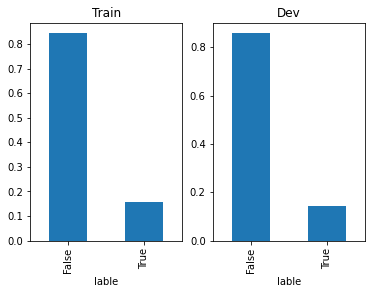

In [ ]:
# 타겟 비율 확인
plt.subplot(1,2,1)  
ax = dataset_train['label'].value_counts(normalize=True).plot.bar()
plt.title('Train')
plt.xlabel('lable')

plt.subplot(1,2,2)
ax = dataset_dev['label'].value_counts(normalize=True).plot.bar()
plt.title('Dev')
plt.xlabel('lable')
plt.show()

댓글의 최소 길이 : 2
댓글의 최대 길이 : 39
댓글의 평균 길이 : 8.399316109422493


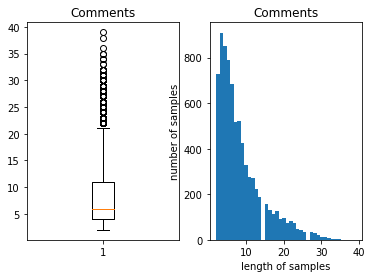

In [ ]:
# 학습 데이터 길이 분포 확인
comments_len = [len(s.split()) for s in dataset_train['comments']]

print('댓글의 최소 길이 : {}'.format(np.min(comments_len)))
print('댓글의 최대 길이 : {}'.format(np.max(comments_len)))
print('댓글의 평균 길이 : {}'.format(np.mean(comments_len)))

plt.subplot(1,2,1)
plt.boxplot(comments_len)
plt.title('Comments')

plt.subplot(1,2,2)
plt.title('Comments')
plt.hist(comments_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 단어 시각화를 위한 형태소 분석기 Mecab 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 https://developer.download.nvidia.com/compute/c

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1322k      0  0:00:01  0:00:01 --:--:-- 5284k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [ ]:
import konlpy
from konlpy.tag import Mecab

In [ ]:
dataset_concat = pd.concat([dataset_train, dataset_dev], names=['comments', 'label'])
assert len(dataset_train) + len(dataset_dev) == len(dataset_concat)

In [ ]:
def getNouns(s):
    if type(s) == str:
        mecab = Mecab()
        nouns_list = mecab.nouns(s) # 문장에서 명사만 추출
        nouns = ' '.join(nouns_list)
        return nouns
    else:
        return str(s)
dataset_concat['nouns'] = dataset_concat['comments'].apply(getNouns)

In [ ]:
true_data = dataset_concat[dataset_concat['label'] == True]
false_data = dataset_concat[dataset_concat['label'] == False]

In [ ]:
true_data.head()

,comments,label,nouns
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,사람 얼굴 손톱 것 인격 살해 동영상 몰카 걸리 안들 생각
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True,년 안 남녀 간 성 전쟁 번 후 일부다처제 여성 정치 참여 금지 여성 투표 삭제 세...
19,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,True,이하 남 결혼 셈 돈 연애 셈 니 유전자 고통 후손 죄
33,"2,30대 골빈여자들은 이 기사에 다 모이는건가ㅋㅋㅋㅋ 이래서 여자는 투표권 주면 ...",True,대 골 여자 기사 건가 여자 투표 엠 넷 사전 투표 계집
45,20대 30대 남자 비율보소 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ할짓 드럽게없나봐.....,True,대 대 남자 비율 보소 짓 거


In [ ]:
# 2) wordcloud 사용한 시각화
from wordcloud import WordCloud
from PIL import Image

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,596 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156090 files and d

In [ ]:
plt.rc('font', family='NanumBarunGothic')   # 한글 폰트 사용 

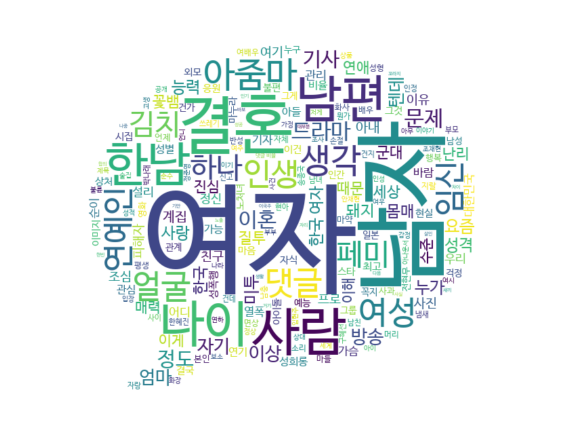

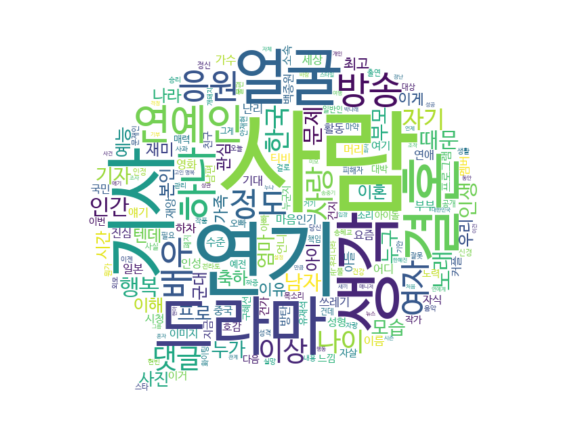

In [ ]:
bubble_mask = np.array(Image.open('/content/drive/MyDrive/project4/speech-bubble.PNG'))

wordcloud = WordCloud(font_path='NanumBarunGothic', 
                      mask=bubble_mask,
                      background_color='white')

# true label에 대한 word cloud 생성
wc_true = wordcloud.generate(' '.join(true_data['nouns']))    

plt.figure(figsize=(10, 10))
plt.imshow(wc_true, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

# false label에 대한 word cloud 생성
wc_false = wordcloud.generate(' '.join(false_data['nouns']))    

plt.figure(figsize=(10, 10))
plt.imshow(wc_false, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# 댓글 내 특수문자 제거
import re

def textCleaning(s):
    res = re.sub(r'[^ A-Za-z0-9가-힣]','',s)    
    return res

dataset_train['comments'] = dataset_train['comments'].apply(textCleaning)
dataset_dev['comments'] = dataset_dev['comments'].apply(textCleaning)

In [ ]:
# label 값 0또는 1로 변경
dataset_dev["label"] = dataset_dev["label"].astype(int)
dataset_train["label"] = dataset_train["label"].astype(int)

In [ ]:
dataset_train.head()

,comments,label
0,현재 호텔주인 심정 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네,0
1,한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요,0
2,못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...,0
3,12화 어설펐는데 34화 지나서부터는 갈수록 너무 재밌던데,0
4,1 사람 얼굴 손톱으로 긁은것은 인격살해이고2 동영상이 몰카냐 메걸리안들 생각이 없노,1


In [ ]:
dataset_dev.head()

,comments,label
0,송중기 시대극은 믿고본다 첫회 신선하고 좋았다,0
1,지현우 나쁜놈,0
2,알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,0
3,설마 현정 작가 아니지,1
4,이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀...,0


###4. ❕딥러닝 방식 적용
---
KoBERT를 사용한 모델 생성
- [naver_review_classifications_pytorch_kobert](https://colab.research.google.com/github/SKTBrain/KoBERT/blob/master/scripts/NSMC/naver_review_classifications_pytorch_kobert.ipynb#scrollTo=itIExnuLbSap) 코드 참고

> 💡 [KoBERT](https://github.com/SKTBrain/KoBERT)는 BERT base multilingual cased의 한국어 성능 한계를 해결하기 위해 만들어진 모델이다.

> 💡 BERT는 2018년 구글에서 발표된 기계번역 모델이다. 이는 약 33억개의 단어로 pre-training 되어 있으며 사용 목적에 따라 fine-tuning이 가능하다는 특징이 있다.

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-ic2v_yv7
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-ic2v_yv7
     |████████████████████████████████| 131 kB 8.2 MB/s 
     |████████████████████████████████| 344 kB 44.6 MB/s 
     |████████████████████████████████| 47.3 MB 70 kB/s 
     |████████████████████████████████| 4.5 MB 46.9 MB/s 
     |████████████████████████████████| 1.2 MB 39.5 MB/s 
     |████████████████████████████████| 3.4 MB 42.2 MB/s 
     |████████████████████████████████| 3.3 MB 51.4 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
     |████████████████████████████████| 596 kB 51.9 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 8.5 MB 41.0 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 127 kB 52.6 MB/s 
  Created wheel for kobert: filename=kobe

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm.notebook import tqdm

In [ ]:
from kobert import get_tokenizer
from kobert import get_pytorch_kobert_model

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
# GPU 설정
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('No GPU available, using the CPU instead')

No GPU available, using the CPU instead


In [ ]:
#BERT 및 Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model(cachedir=".cache")

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
!wget -O .cache/ratings_train.txt http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
!wget -O .cache/ratings_test.txt http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt

--2022-01-14 07:15:22--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_train.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.144.59
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.144.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘.cache/ratings_train.txt’

.cache/ratings_trai 100%[===================>]  13.95M  9.45MB/s    in 1.5s    

2022-01-14 07:15:24 (9.45 MB/s) - ‘.cache/ratings_train.txt’ saved [14628807/14628807]

--2022-01-14 07:15:24--  http://skt-lsl-nlp-model.s3.amazonaws.com/KoBERT/datasets/nsmc/ratings_test.txt
Resolving skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)... 52.219.60.146
Connecting to skt-lsl-nlp-model.s3.amazonaws.com (skt-lsl-nlp-model.s3.amazonaws.com)|52.219.60.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
train_list[0][0]

'현재 호텔주인 심정 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네'

In [ ]:
from gluonnlp.data import SentencepieceTokenizer

sp  = SentencepieceTokenizer(tok_path)
print(sp(train_list[0][0]))

['▁현재', '▁호텔', '주', '인', '▁심', '정', '▁아', '18', '▁난', '▁마', '른', '하늘', '에', '▁날', '벼', '락', '맞', '고', '▁호텔', '망', '하게', '생', '겼', '는데', '▁누', '군', '▁계속', '▁추', '모', '받', '네']


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
## Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
def makeDatalist(df):
    data_list = []
    for comment, label in zip(df['comments'], df['label']):
        temp = []
        temp.append(comment)
        temp.append(label)
        data_list.append(temp)
    return data_list

train_list = makeDatalist(dataset_train)
dev_list = makeDatalist(dataset_dev)

In [ ]:
data_train = BERTDataset(train_list, 0, 1, tok, max_len, True, False)
data_dev = BERTDataset(dev_list, 0, 1, tok, max_len, True, False)

In [ ]:
# 토큰화 확인
data_train[0]

(array([   2, 5064, 5095, 7276, 7119, 3060, 7227, 3093,  115, 1406, 1907,
        6115, 7796, 6896, 1407, 6353, 6015, 6166, 5439, 5095, 6165, 7784,
        6542, 5422, 5761, 1526, 5512,  984, 4541, 6213, 6288, 5702,    3,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int32),
 array(33, dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32),
 0)

In [ ]:
# torch 형식의 dataset 생성
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
dev_dataloader = torch.utils.data.DataLoader(data_dev, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)   # gradient clipping
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in tqdm(enumerate(dev_dataloader), total=len(dev_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.09020485728979111 train acc 0.96875
epoch 1 train acc 0.9863911290322581


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 1 test acc 0.9453125


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.06468575447797775 train acc 0.984375
epoch 2 train acc 0.9862651209677419


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 2 test acc 0.935546875


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.09244494140148163 train acc 0.96875
epoch 3 train acc 0.9871471774193549


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 3 test acc 0.919921875


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.12261347472667694 train acc 0.96875
epoch 4 train acc 0.9873991935483871


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 4 test acc 0.9340183423913043


  0%|          | 0/124 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.006448253057897091 train acc 1.0
epoch 5 train acc 0.9834929435483871


  0%|          | 0/8 [00:00<?, ?it/s]

epoch 5 test acc 0.9320652173913043


### ✨***TEST with Kaggle***
---
Kaggle [Korean Gender Bias Detection
](https://www.kaggle.com/c/korean-gender-bias-detection/submissions) competition 제출

본 competition에서 평가 기준은 **F1-Score** 사용
- [BASELINE] BERT score 0.68138
- koBERT 모델 사용 시 score 0.70833 (***기존 파라미터 변경***❌)
    - epoch 5👉7 변경: score 0.67752

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/project4/gender_bias_data/test.gender_bias.no_label.csv')

pred = pd.DataFrame()
pred['comments'] = dataset_test['comments'].copy()  # 캐글 제출용

dataset_test['comments'] = dataset_test['comments'].apply(textCleaning)
dataset_test['label'] = 0

dataset_test.head()

,comments,label
0,그래도 조아해주는 팬들 많아서 좋겠다 니들은 온유가 안만져줌,0
1,둘다 넘 좋다행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
3,원곡생각하나도 안나고 러블리즈 신곡나온줄 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다,0


In [ ]:
test_list = makeDatalist(dataset_test)
data_test = BERTDataset(test_list, 0, 1, tok, max_len, True, False)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
predictions =[]
with torch.no_grad():
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
    token_ids = token_ids.long().cuda()
    segment_ids = segment_ids.long().cuda()
    valid_length= valid_length
    label = label.long().cuda()
    out = model(token_ids, valid_length, segment_ids)
    _, max_indices = torch.max(out, 1)

    predictions.extend(max_indices.squeeze(0).detach().cpu().numpy())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
predictions = pd.Series(predictions, name='label')    # series 형태로 변경
pred = pd.concat([pred['comments'], predictions], axis=1)
pred.head()

,comments,label
0,ㅋㅋㅋㅋ 그래도 조아해주는 팬들 많아서 좋겠다 ㅠㅠ 니들은 온유가 안만져줌 ㅠㅠ,0
1,둘다 넘 좋다~행복하세요,0
2,근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데,0
3,원곡생각하나도 안나고 러블리즈 신곡나온줄!!! 너무 예쁘게 잘봤어요,0
4,장현승 얘도 참 이젠 짠하다...,0


In [ ]:
# 캐글 제출 용 csv 파일 저장
pred.to_csv("/content/drive/MyDrive/submission4.csv", index= False, encoding="utf-8-sig")

### ✨***TEST with User comment***
---

In [ ]:
def predUserComment(comment):
    comment = textCleaning(comment) # 댓글 내 특수문자 제거
    data = [comment, '0']   # 리스트 형태로 변경   
    dataset = [data]   

    dataset = BERTDataset(dataset, 0, 1, tok, max_len, True, False)
    comment_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(comment_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length = valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            if np.argmax(logits) == 0:
                result = "False"
            elif np.argmax(logits) == 1:
                result = "True"
    return result

In [ ]:
prediction = predUserComment('나쁜 댓글 멈춰🖐🖐')
# 서비스 사용 예시
if prediction == 'False':
    print('댓글이 정상적으로 등록되었습니다.')
else:
    print('댓글에서 혐오 및 차별 표현이 감지되었습니다.')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


댓글이 정상적으로 등록되었습니다.
